# Import the data
The very first step is to import the data in notebook that can be further used and get a glismpse of data to know how our data actually looks.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizations
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\terrorism.csv", encoding = "ISO-8859-1", engine='python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Data cleaning
Most of our data have NaN or 0's none of them are of our use, the next step is to clean our data and select only few columns from whole data that acually worth to us.

In [4]:
columns = ['iyear', 'imonth', 'iday', 'country_txt', 'city', 'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt']
df = df[columns]
df = df[(df[['iyear','imonth', 'iday']] != 0).all(axis=1)]
df.dropna()

,iyear,imonth,iday,country_txt,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Named Civilian
5,1970,1,1,United States,Cairo,37.005105,-89.176269,1,Armed Assault,Police,"Police Building (headquarters, station, school)"
6,1970,1,2,Uruguay,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Police Security Forces/Officers
7,1970,1,2,United States,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,Electricity
8,1970,1,2,United States,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy
9,1970,1,3,United States,Madison,43.072950,-89.386694,1,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office
10,1970,1,1,United States,Baraboo,43.468500,-89.744299,0,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost
11,1970,1,6,United States,Denver,39.758968,-104.876305,1,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy
12,1970,1,8,Italy,Rome,41.890961,12.490069,1,Hijacking,Airports & Aircraft,Aircraft (not at an airport)
13,1970,1,9,United States,Detroit,42.331685,-83.047924,1,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office


# Data Exploration
Let's try to explore our data before getting into machine learning stuff.

### Attacks in few countries since 1970

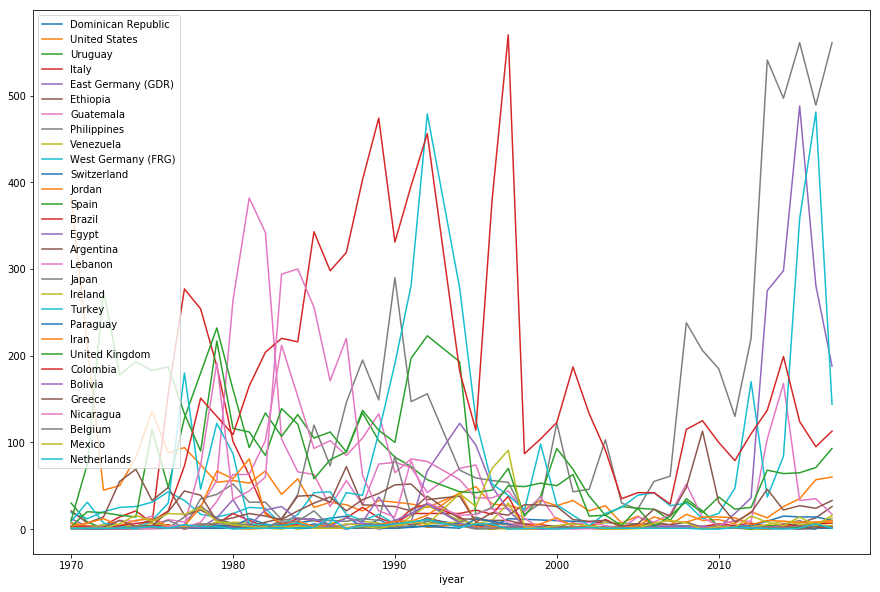

In [5]:
fig = plt.figure(figsize=(15,10))
countries = df[['country_txt']].drop_duplicates()
countries.values.tolist()
countries = [country for country_list in countries.values.tolist() for country in country_list]
for country in countries[:30]:
    country_data = df.loc[df['country_txt']==country]
    country_data.groupby('iyear').success.sum().plot(label=country)
plt.legend(loc='best')
plt.show()

### Top 10 countries who face the most terrorist atack since 1970

In [6]:
total_attacks_in_each_country = df.groupby('country_txt').count()
countries_who_faced_max_attacks =  total_attacks_in_each_country.sort_values('success', ascending=False)[:10].index
countries_who_faced_max_attacks.values.tolist()
print("Countries who faced most terrorist attacks since 1970 are: ")
for country in countries_who_faced_max_attacks:
    print(f"{country}")

Countries who faced most terrorist attacks since 1970 are: 
Iraq
Pakistan
Afghanistan
India
Colombia
Philippines
Peru
El Salvador
United Kingdom
Turkey


### Number of terrorist attack per year

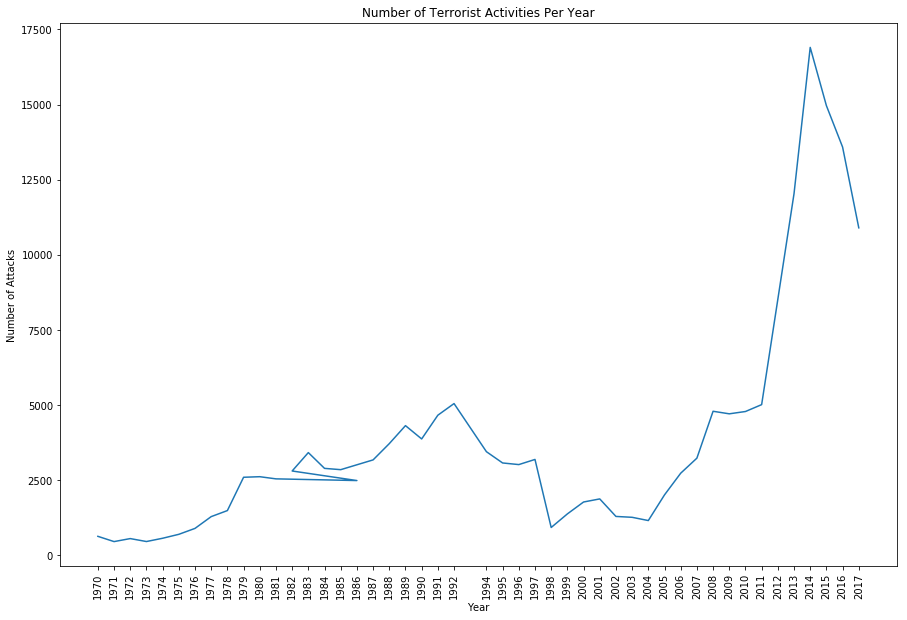

In [7]:
fig = plt.figure(figsize=(15,10))
x = df['iyear'].unique()
y = df.groupby('iyear').count()['country_txt']
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Activities Per Year')
plt.xticks(x, x, rotation='90') # x, label, rotation
plt.show()

# Model Trainning
Let's dive into trainning our model. Most of the cases it is very obious to find out which algorithm best suits for mahcine learning. In some cases it becomes a little bit tough for us to decide which algorithm suits best, we are going to use random forest as our data have multiple types so best algorithm which suits best for our problem in my sight is random forest.

Let's dive!!

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
features_columns = ['iyear', 'imonth', 'iday','latitude', 'longitude', 'success']
output_columns = ['iyear', 'imonth', 'iday', 'latitude', 'longitude']
cleaned_data = pd.DataFrame(df[features_columns]).fillna(0)
features = cleaned_data[features_columns]
target = cleaned_data[output_columns]
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)
forest_model = RandomForestRegressor(max_depth=2, random_state=0)
forest_model.fit(X_train,y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

10.763107930683725
